# Heart Attack Predictor

### Importing libraries

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split as tts

### Reading Data

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()
# df.tail()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Preprocessing

In [5]:
X = df.drop("output", axis=1)
y = df[["output"]].values

In [6]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=0)

### Fitting Models

In [7]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

lr = LogisticRegression()
lr.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

c:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Prediction

In [8]:
dtc_ypred = dtc.predict(X_test)
rfc_ypred = rfc.predict(X_test)
lr_ypred = lr.predict(X_test)
knn_ypred = knn.predict(X_test)
xgbc_ypred = xgbc.predict(X_test)

### Confusion Matrixes of Models¶


In [9]:
from sklearn.metrics import confusion_matrix

In [10]:
dtc_cm = confusion_matrix(y_test, dtc_ypred)
rfc_cm = confusion_matrix(y_test, rfc_ypred)
lr_cm = confusion_matrix(y_test, lr_ypred)
knn_cm = confusion_matrix(y_test, knn_ypred)
xgbc_cm = confusion_matrix(y_test, xgbc_ypred)

In [11]:
from seaborn import heatmap as hm
import matplotlib.pyplot as plt

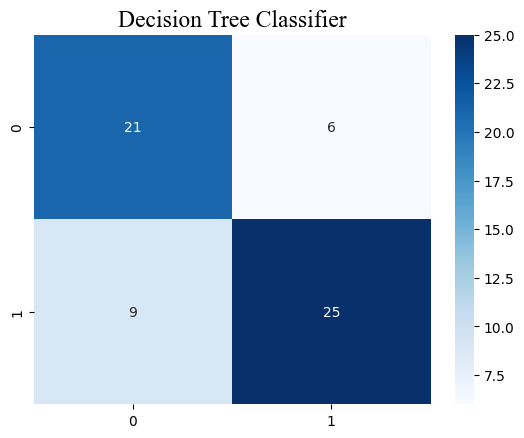

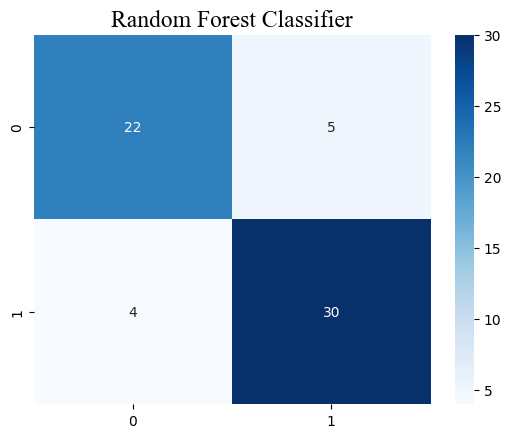

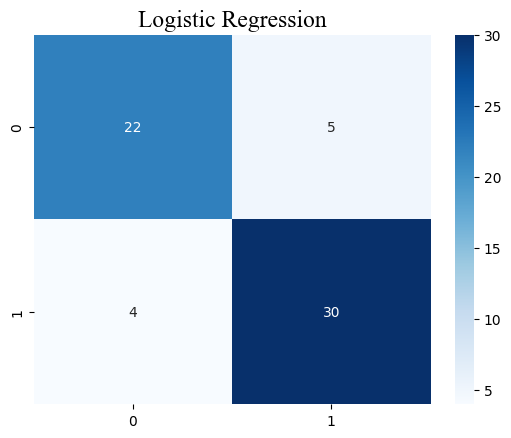

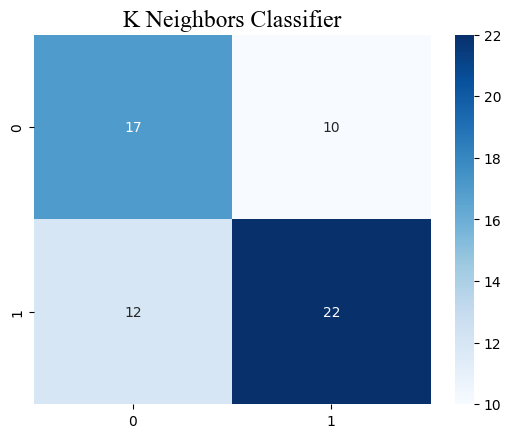

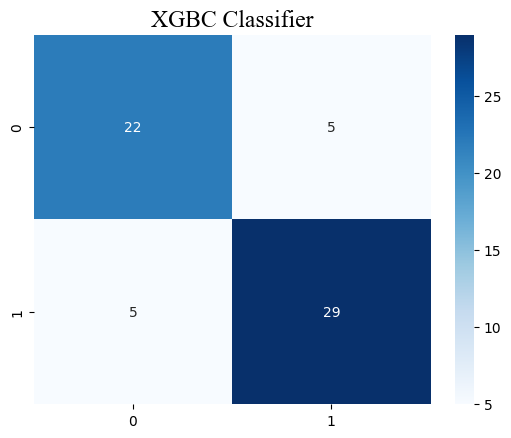

In [12]:
hm(dtc_cm, annot=True, cmap="Blues")
plt.title("Decision Tree Classifier", fontsize=17, fontname="Times New Roman")
plt.show()

hm(rfc_cm, annot=True, cmap="Blues")
plt.title("Random Forest Classifier", fontsize=17, fontname="Times New Roman")
plt.show()

hm(lr_cm, annot=True, cmap="Blues")
plt.title("Logistic Regression", fontsize=17, fontname="Times New Roman")
plt.show()

hm(knn_cm, annot=True, cmap="Blues")
plt.title("K Neighbors Classifier", fontsize=17, fontname="Times New Roman")
plt.show()

hm(xgbc_cm, annot=True, cmap="Blues")
plt.title("XGBC Classifier", fontsize=17, fontname="Times New Roman")
plt.show()

### Accuracy Scores of Models¶


In [13]:
dtc_score = dtc.score(X_test, y_test)
rfc_score = rfc.score(X_test, y_test)
lr_score = lr.score(X_test, y_test)
knn_score = knn.score(X_test, y_test)
xgbc_score = xgbc.score(X_test, y_test)

Text(0.5, 0, 'Models')

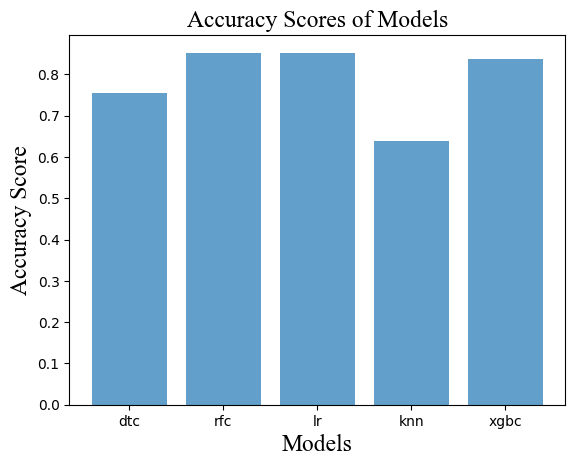

In [14]:
index = ["dtc", "rfc", "lr", "knn", "xgbc"]
values = [dtc_score, rfc_score, lr_score, knn_score, xgbc_score]
plt.bar(index,values, alpha=0.7)
plt.title("Accuracy Scores of Models", fontsize=17, fontname="Times New Roman")
plt.ylabel("Accuracy Score", fontsize=17, fontname="Times New Roman")
plt.xlabel("Models", fontsize=17, fontname="Times New Roman")

In [15]:
import pickle

In [16]:
with open('model.pkl', 'wb') as f:
    pickle.dump(rfc, f)